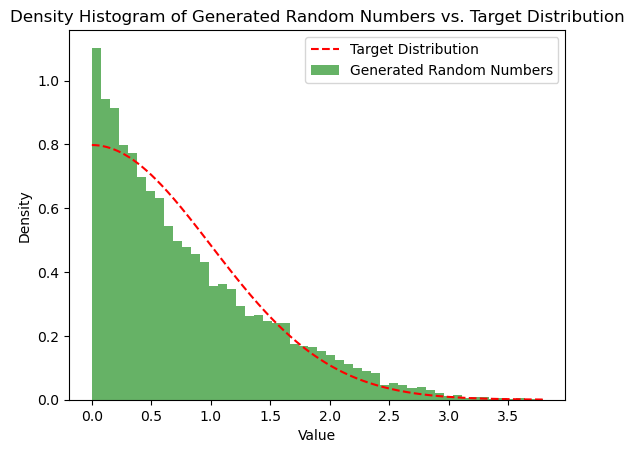

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    return (2 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

def proposal_distribution(x, lam):
    return lam * np.exp(-lam * x)

def rejection_sampling(n_samples, lam):
    samples = []
    c = np.sqrt(np.e / (2 * np.pi))  # the value of c

    while len(samples) < n_samples:
        y = np.random.exponential(1/lam)
        u = np.random.uniform(0, 1)
        if u <= target_distribution(y) / (c * proposal_distribution(y, lam)):
            samples.append(y)
    
    return np.array(samples)

n_samples = 10000
lam = 1 
random_numbers = rejection_sampling(n_samples, lam)

plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='g')

x = np.linspace(0, max(random_numbers), 1000)
target_pdf = target_distribution(x)
plt.plot(x, target_pdf, 'r--')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Histogram of Generated Random Numbers vs. Target Distribution')
plt.legend(['Target Distribution', 'Generated Random Numbers'])

plt.show()
